# 5.1 Simulating Consumer Segment Data
## 5.1.1 Segment Data Definition

In [21]:
segVars <- c("age","gender","income","kids","ownHome","subscribe")
segVarType <- c("norm","binom","norm","pois","binom","binom")
segNames <- c("Suburb mix","Urban hip","Travelers","Moving Up")
segSize <- c(100,50,80,70)

In [22]:
segMeans <- matrix(c(
    40,0.5,55000,2,0.5,0.1,
    24,0.7,21000,1,0.2,0.2,
    58,0.5,64000,0,0.7,0.05,
    36,0.3,52000,2,0.3,0.2), ncol=length(segVars), byrow=TRUE)

In [23]:
# standard deviation for each segment
# NA = not applicable for the variable
segSDs <- matrix(c(
    5,NA,12000,NA,NA,NA,
    2,NA, 5000,NA,NA,NA,
    8,NA,21000,NA,NA,NA,
    4,NA,10000,NA,NA,NA), ncol=length(segVars), byrow=TRUE)

## 5.1.4 Final Segment Data Generation

In [24]:
seg.df <- NULL
set.seed(02554)

# iterate over segment and create data for each
for(i in seq_along(segNames)){
    cat(i, segNames[i], "\n")
    
    # empty matrix to hold this particular segmet's data
    this.seg <- data.frame(matrix(NA, nrow=segSize[i], ncol=length(segVars)))
    
    # within segment, iterate over variables and draw appropriate random data
    for(j in seq_along(segVars)){ # and iterate over each variable
        if(segVarType[j]=="norm"){ # draw random normals
            this.seg[,j] <- rnorm(segSize[i],mean=segMeans[i,j],sd=segSDs[i,j])
        }else if(segVarType[j]=="pois"){ # draw counts
            this.seg[,j] <- rpois(segSize[i], lambda=segMeans[i,j])
        }else if(segVarType[j]=="binom"){ # draw binomails
            this.seg[,j] <- rbinom(segSize[i], size=1, prob=segMeans[i,j])
        }else{
            stop("Bad segment data type", segVarType[j])
        }
    }
    seg.df <- rbind(seg.df,this.seg)
}

1 Suburb mix 
2 Urban hip 
3 Travelers 
4 Moving Up 


In [25]:
# make the data frame names match what we defined
names(seg.df) <- segVars
# add segment membership for each row
seg.df$Segment <- factor(rep(segNames, times=segSize))

In [28]:
# convert the binomial variables to nicely labeled factors
seg.df$ownHome <- factor(seg.df$ownHome, labels=c("ownNo","ownYes"))
seg.df$gender <- factor(seg.df$gender, labels=c("Female","Male"))
seg.df$subscribe <- factor(seg.df$subscribe, labels=c("subNo","subYes"))

In [29]:
summary(seg.df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe         Segment   
 subNo :260   Moving Up : 70  
 subYes: 40   Suburb mix:100  
              Travelers : 80  
              Urban hip : 50  
                              
                              

In [30]:
save(seg.df, file="./segdf-Rintro-Ch5.RData")

# 5.2 Finding Descriptives by Group

In [31]:
mean(seg.df$income[seg.df$Segment=="Moving Up"])

[1] 53090.97

In [32]:
mean(seg.df$income[seg.df$Segment=="Moving Up" &
                                      seg.df$subscribe=="subNo"])

[1] 53633.73

In [33]:
by(seg.df$income, seg.df$Segment, mean)

seg.df$Segment: Moving Up
[1] 53090.97
------------------------------------------------------------ 
seg.df$Segment: Suburb mix
[1] 55033.82
------------------------------------------------------------ 
seg.df$Segment: Travelers
[1] 62213.94
------------------------------------------------------------ 
seg.df$Segment: Urban hip
[1] 21681.93

In [34]:
by(seg.df$income, list(seg.df$Segment,seg.df$subscribe), mean)

: Moving Up
: subNo
[1] 53633.73
------------------------------------------------------------ 
: Suburb mix
: subNo
[1] 54942.69
------------------------------------------------------------ 
: Travelers
: subNo
[1] 62746.11
------------------------------------------------------------ 
: Urban hip
: subNo
[1] 22082.11
------------------------------------------------------------ 
: Moving Up
: subYes
[1] 50919.89
------------------------------------------------------------ 
: Suburb mix
: subYes
[1] 56461.41
------------------------------------------------------------ 
: Travelers
: subYes
[1] 58488.77
------------------------------------------------------------ 
: Urban hip
: subYes
[1] 20081.19

In [35]:
aggregate(seg.df$income, list(seg.df$Segment), mean)

Group.1,x
Moving Up,53090.97
Suburb mix,55033.82
Travelers,62213.94
Urban hip,21681.93


In [36]:
seg.income.mean <- aggregate(seg.df$income, list(seg.df$Segment), mean)
seg.df$segIncome <- seg.income.mean[seg.df$Segment,2]

In [37]:
library(car)
some(seg.df)

,age,gender,income,kids,ownHome,subscribe,Segment,segIncome
58,34.46528,Male,60971.76,2,ownNo,subNo,Suburb mix,55033.82
79,42.31337,Male,49674.79,0,ownYes,subNo,Suburb mix,55033.82
124,22.30333,Female,24541.24,1,ownNo,subNo,Urban hip,21681.93
136,23.08861,Male,33909.50,3,ownNo,subNo,Urban hip,21681.93
158,43.35230,Male,51787.88,0,ownNo,subNo,Travelers,62213.94
186,48.84991,Female,59075.12,0,ownNo,subNo,Travelers,62213.94
232,37.85733,Male,50980.48,5,ownYes,subNo,Moving Up,53090.97
243,36.97339,Female,53792.40,0,ownNo,subNo,Moving Up,53090.97
257,43.30929,Female,69549.93,3,ownNo,subYes,Moving Up,53090.97
288,35.82586,Female,41766.29,2,ownNo,subYes,Moving Up,53090.97


In [40]:
seg.df$segIncome <- seg.income.mean[seg.df$Segment, 2]
seg.df$Segment

[1] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
  [7] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [13] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [19] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [25] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [31] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [37] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [43] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [49] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [55] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [61] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [67] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [73] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [79] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [85] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [91] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix
 [97] Suburb mix Suburb mix Suburb mix Suburb mix Urban hip  Urban hip 
[103] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[109] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[115] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[121] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[127] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[133] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[139] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[145] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
[151] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[157] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[163] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[169] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[175] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[181] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[187] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[193] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[199] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[205] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[211] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[217] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[223] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
[229] Travelers  Travelers  Moving Up  Moving Up  Moving Up  Moving Up 
[235] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[241] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[247] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[253] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[259] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[265] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[271] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[277] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[283] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[289] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[295] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
Levels: Moving Up Suburb mix Travelers Urban hip

In [42]:
seg.income.mean[seg.df$Segment,]

,Group.1,x
2,Suburb mix,55033.82
2.1,Suburb mix,55033.82
2.2,Suburb mix,55033.82
2.3,Suburb mix,55033.82
2.4,Suburb mix,55033.82
2.5,Suburb mix,55033.82
2.6,Suburb mix,55033.82
2.7,Suburb mix,55033.82
2.8,Suburb mix,55033.82
2.9,Suburb mix,55033.82


In [43]:
seg.income.mean[seg.df$Segment, 2]

[1] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
  [9] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [17] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [25] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [33] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [41] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [49] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [57] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [65] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [73] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [81] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [89] 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82 55033.82
 [97] 55033.82 55033.82 55033.82 55033.82 21681.93 21681.93 21681.93 21681.93
[105] 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93
[113] 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93
[121] 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93
[129] 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93
[137] 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93
[145] 21681.93 21681.93 21681.93 21681.93 21681.93 21681.93 62213.94 62213.94
[153] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[161] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[169] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[177] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[185] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[193] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[201] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[209] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[217] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94
[225] 62213.94 62213.94 62213.94 62213.94 62213.94 62213.94 53090.97 53090.97
[233] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[241] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[249] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[257] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[265] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[273] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[281] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[289] 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97 53090.97
[297] 53090.97 53090.97 53090.97 53090.97

In [44]:
seg.df$segIncome <-  NULL
some(seg.df)

,age,gender,income,kids,ownHome,subscribe,Segment
71,36.22376,Female,53428.06,1,ownNo,subNo,Suburb mix
84,34.28161,Male,49346.70,2,ownYes,subYes,Suburb mix
86,35.87205,Male,39442.72,1,ownNo,subNo,Suburb mix
91,45.19053,Male,68937.20,5,ownYes,subNo,Suburb mix
171,64.85144,Female,78231.33,0,ownYes,subNo,Travelers
173,64.70641,Male,45517.15,0,ownNo,subYes,Travelers
184,68.05148,Male,104312.45,0,ownYes,subNo,Travelers
185,50.50749,Female,48946.07,0,ownYes,subYes,Travelers
202,64.63338,Male,113456.80,0,ownNo,subNo,Travelers
290,42.40763,Male,53520.36,1,ownNo,subNo,Moving Up


## 5.2.2 Descriptives for Two-Way Groups

In [45]:
aggregate(income ~ Segment + ownHome, data=seg.df, mean)

Segment,ownHome,income
Moving Up,ownNo,54497.68
Suburb mix,ownNo,54932.83
Travelers,ownNo,63188.42
Urban hip,ownNo,21337.59
Moving Up,ownYes,50216.37
Suburb mix,ownYes,55143.21
Travelers,ownYes,61889.12
Urban hip,ownYes,23059.27


In [46]:
aggregate(income ~Segment + ownHome + subscribe, data=seg.df, mean)

Segment,ownHome,subscribe,income
Moving Up,ownNo,subNo,55402.89
Suburb mix,ownNo,subNo,54579.99
Travelers,ownNo,subNo,65852.54
Urban hip,ownNo,subNo,21604.16
Moving Up,ownYes,subNo,49898.85
Suburb mix,ownYes,subNo,55354.86
Travelers,ownYes,subNo,61749.71
Urban hip,ownYes,subNo,23993.93
Moving Up,ownNo,subYes,50675.70
Suburb mix,ownNo,subYes,63753.97


In [48]:
agg.data <- aggregate(income ~ Segment + ownHome, data=seg.df, mean)
agg.data[2,]

,Segment,ownHome,income
2,Suburb mix,ownNo,54932.83


In [49]:
# Segment ごとに家を持っているか表示する
with(seg.df,table(Segment, ownHome))

            ownHome
Segment      ownNo ownYes
  Moving Up     47     23
  Suburb mix    52     48
  Travelers     20     60
  Urban hip     40     10

In [50]:
# Segmentごとのkidsの数
with(seg.df, table(kids, Segment))

    Segment
kids Moving Up Suburb mix Travelers Urban hip
   0        13         11        80        17
   1        17         36         0        17
   2        18         22         0        11
   3        13         19         0         4
   4         5          7         0         1
   5         3          3         0         0
   6         0          2         0         0
   7         1          0         0         0

In [51]:
# Segmentごとkidsの総数
xtabs(kids ~ Segment, data=seg.df)

Segment
 Moving Up Suburb mix  Travelers  Urban hip 
       134        192          0         55 

In [52]:
# 上と同じ計算をaggregate()で
aggregate(kids ~ Segment, data=seg.df, sum)

Segment,kids
Moving Up,134
Suburb mix,192
Travelers,0
Urban hip,55


In [54]:
# 上と同じことをwithとapplyで
seg.tab <- with(seg.df, table(kids, Segment))
apply(seg.tab*0:7, 2, sum)

Moving Up Suburb mix  Travelers  Urban hip 
       134        192          0         55

In [56]:
# 上と同じことをwithとcolSumsで
seg.tab <- with(seg.df, table(kids, Segment))
colSums(seg.tab*0:7)

Moving Up Suburb mix  Travelers  Urban hip 
       134        192          0         55

## 5.2.3 Visualizatio by Group: Frequencies and Proportions

Loading required package: lattice


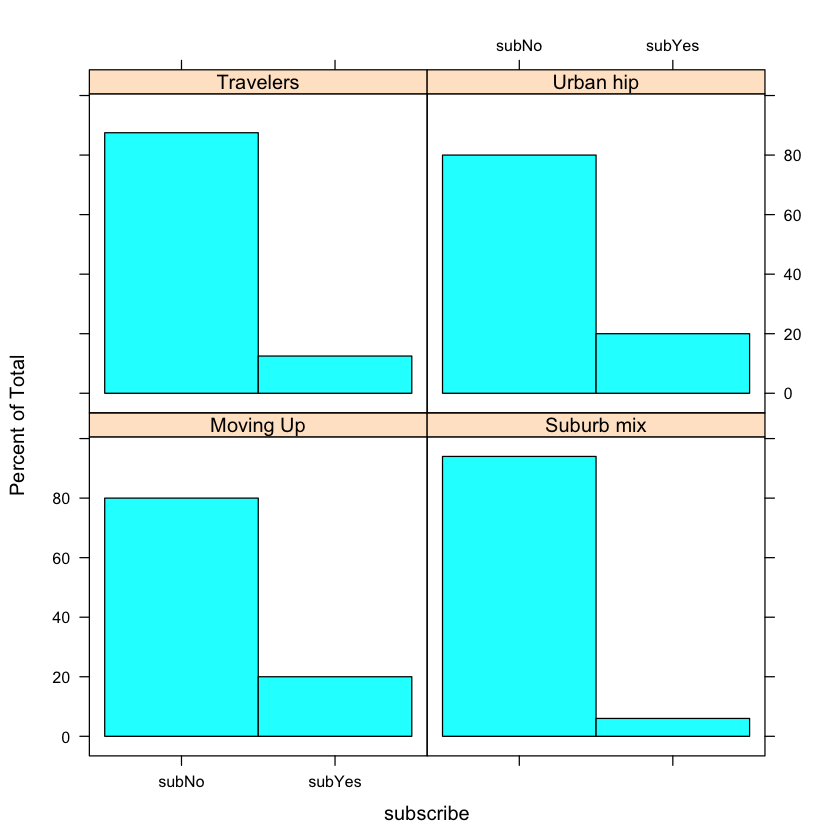

In [57]:
require(lattice)
histogram(~subscribe | Segment, data=seg.df)

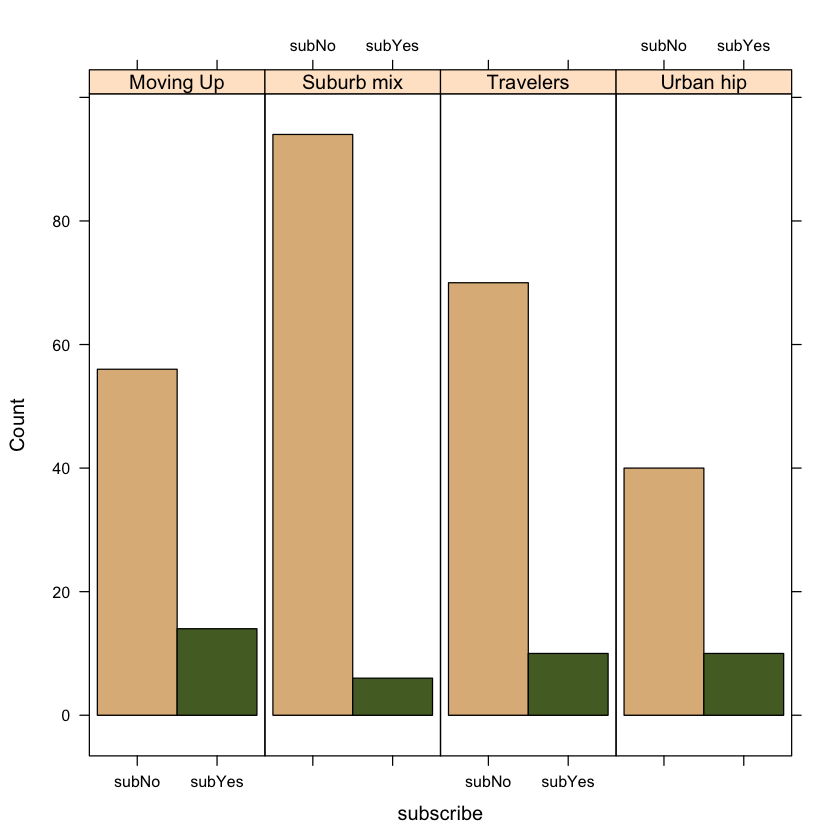

In [58]:
histogram(~subscribe | Segment, data=seg.df, type="count",
         layout=c(4,1), col=c("burlywood", "darkolivegreen"))


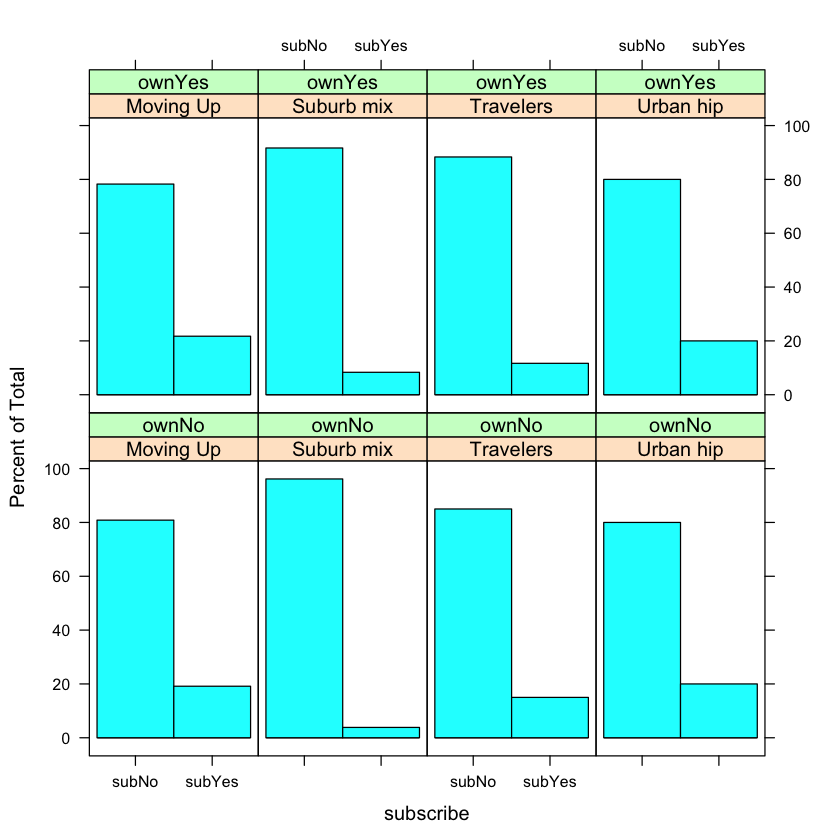

In [59]:
histogram(~subscribe | Segment + ownHome, data=seg.df)

In [60]:
prop.table(table(seg.df$subscribe, seg.df$Segment), margin=2)

        
         Moving Up Suburb mix Travelers Urban hip
  subNo      0.800      0.940     0.875     0.800
  subYes     0.200      0.060     0.125     0.200

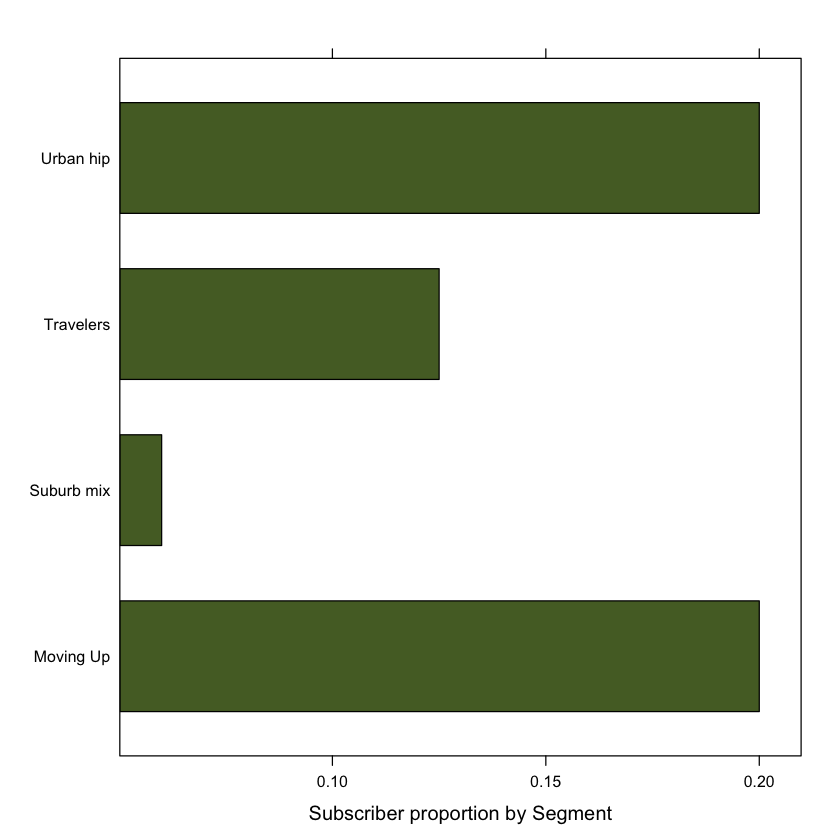

In [62]:
barchart(prop.table(table(seg.df$subscribe,seg.df$Segment), margin=2)[2,],
        xlab="Subscriber proportion by Segment", col="darkolivegreen")

## 5.2.4 Visualization by Group: Continuous Data

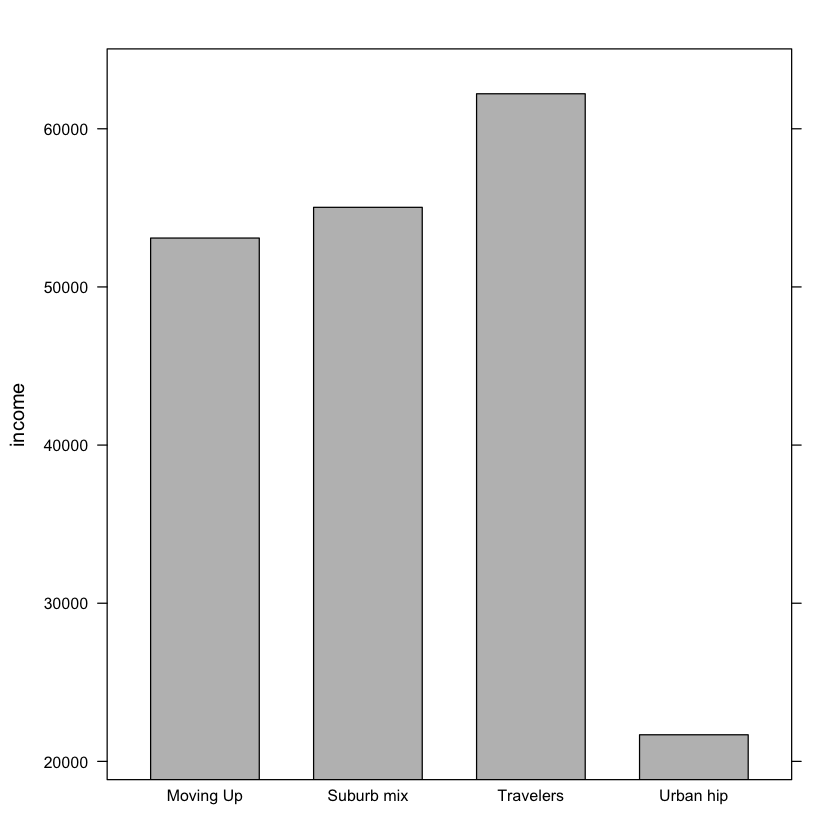

In [63]:
seg.mean <- aggregate(income ~ Segment, data=seg.df, mean)
library(lattice)
barchart(income ~ Segment, data=seg.mean, col="gray")

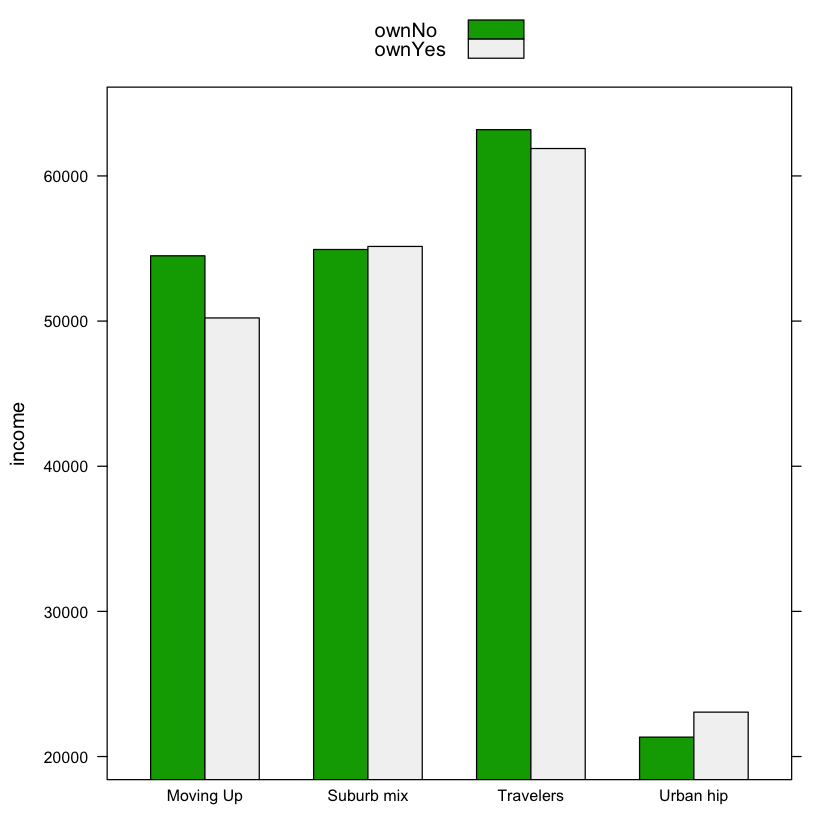

In [65]:
seg.income.agg <- aggregate(income ~ Segment + ownHome, data=seg.df, mean)
barchart(income ~ Segment, data=seg.income.agg,
        groups=ownHome, auto.key=TRUE, 
        par.settings=simpleTheme(col=terrain.colors(2)))

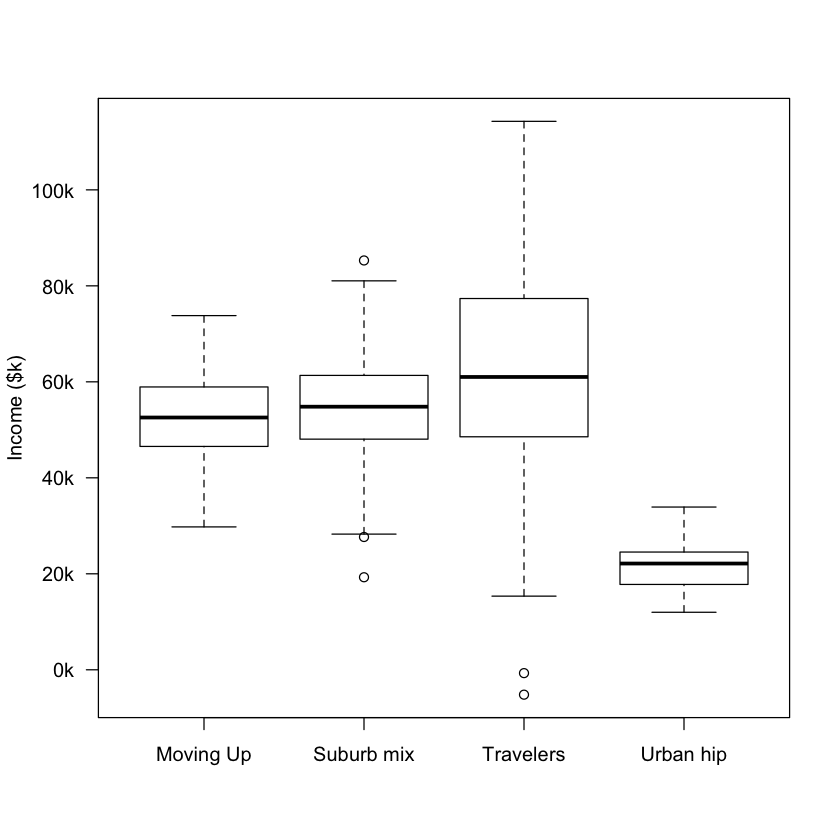

In [66]:
boxplot(income ~ Segment, data=seg.df, yaxt="n", ylab="Income ($k)")
ax.seq <- seq(from=0, to=120000, by=20000)
axis(side=2, at=ax.seq, labels=paste(ax.seq/1000, "k", sep=""),las=1)

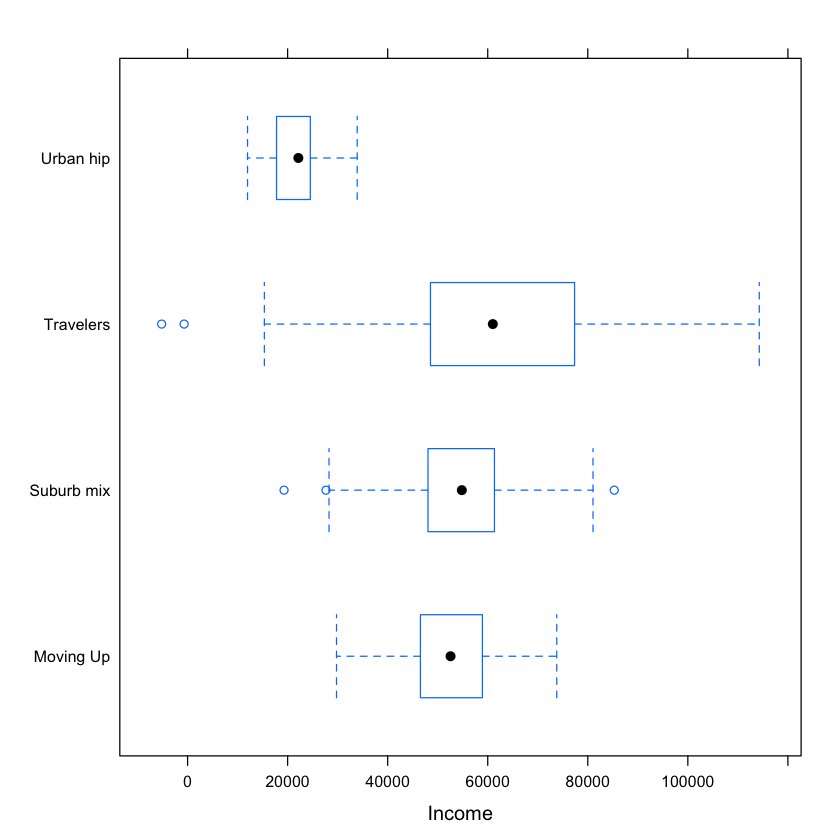

In [70]:
bwplot(Segment ~ income, data=seg.df, horizontal=TRUE, xlab="Income")

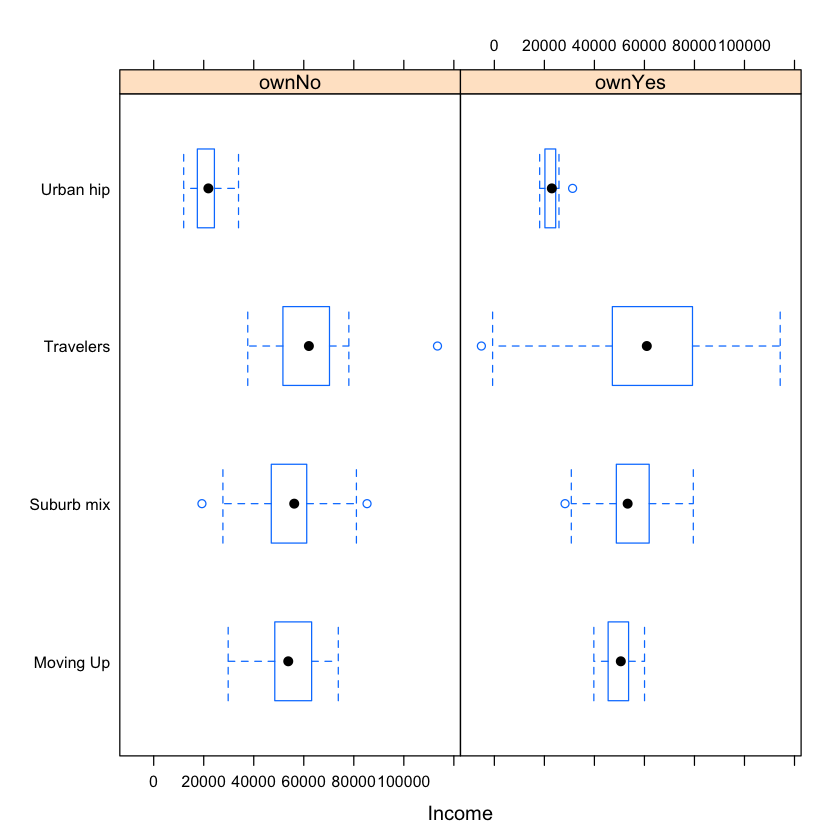

In [72]:
bwplot(Segment ~ income | ownHome, data=seg.df, horizontal=TRUE, xlab="Income")